In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider
%matplotlib inline
!jupyter nbextension enable --py widgetsnbextension


/bin/sh: jupyter: command not found


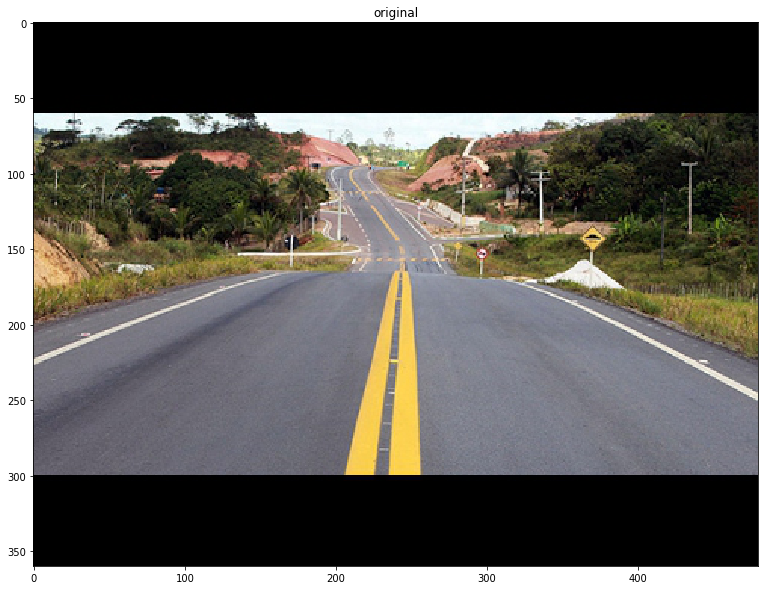

In [2]:
f_orig = cv.imread('../TestingImages/T5.jpg') #cv gives bgr, matlab requires rgb
f_rgb = cv.cvtColor(f_orig, cv.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(f_rgb)
plt.title('original')
plt.show()

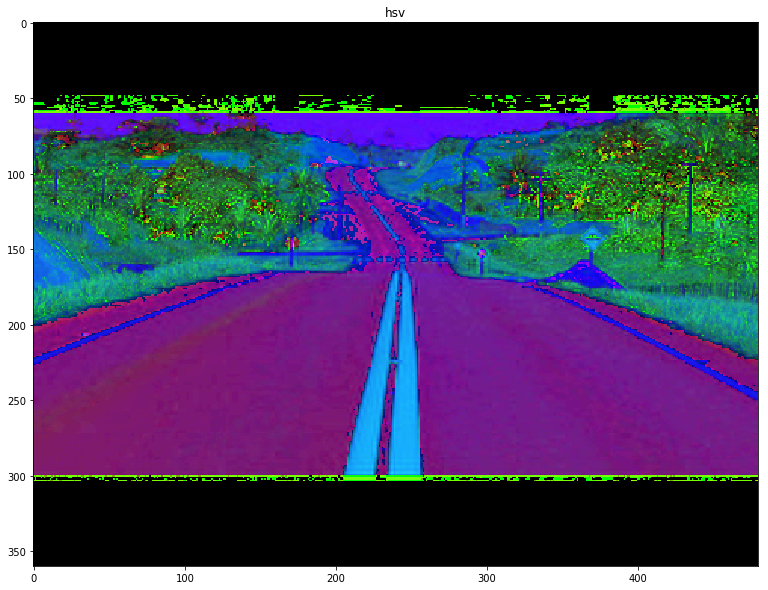

In [3]:
f_hsv = cv.cvtColor(f_orig, cv.COLOR_BGR2HSV)
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(f_hsv)
plt.title('hsv')
plt.show()

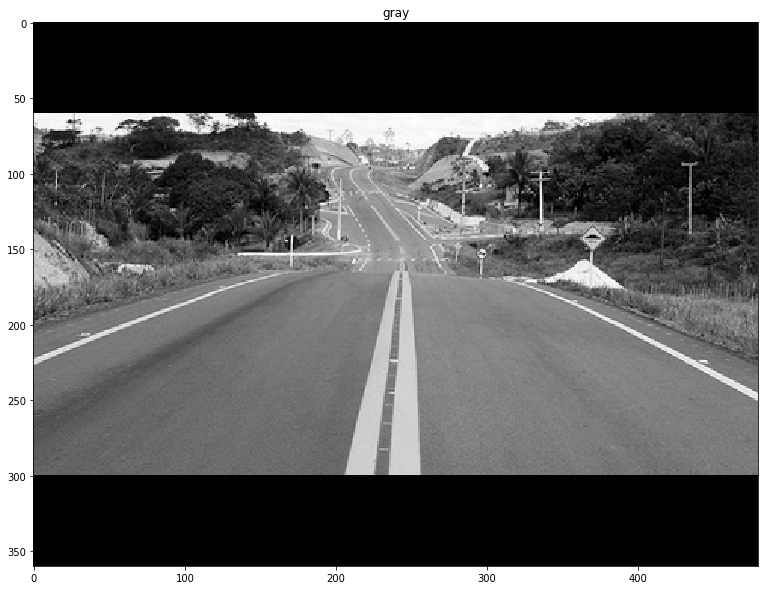

In [4]:
f_gray = cv.cvtColor(f_orig, cv.COLOR_BGR2GRAY)
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(f_gray, cmap='gray')
plt.title('gray')
plt.show()

In [5]:
class ClrThresholding:
    name = 'masked'
    lower_clr = np.array([14, 80, 154])
    upper_clr = np.array([23, 175, 255])
    
    def nothing(x):
        pass

    def clrFilteringHSV(self, frame_, frame_hsv_):
        mask = cv.inRange(frame_hsv_, self.lower_clr, self.upper_clr)
        kernel = np.ones((5,5), np.uint8)
        img_erosion = cv.erode(mask, kernel, iterations=4)
        img_dilation = cv.dilate(mask, kernel, iterations=1)
        
        res = cv.bitwise_and(frame_, frame_, mask=mask)
        plt.rcParams['figure.figsize'] = [20, 10]
        plt.imshow(res)
        plt.title(self.name)
        plt.show()
        return res, mask
    
    def clrFilteringGRAY(self, frame_, frame_gry_):
        mask = cv.inRange(frame_gry_, self.lower_clr, self.upper_clr)
        kernel = np.ones((5,5), np.uint8)
        img_erosion = cv.erode(mask, kernel, iterations=4)
        img_dilation = cv.dilate(mask, kernel, iterations=1)
        
        masked_img = np.zeros_like(frame_)
        for i in range(3):
            masked_img[:,:,i] = mask
    
        plt.rcParams['figure.figsize'] = [20, 10]
        plt.imshow(masked_img)
        plt.title(self.name)
        plt.show()

        return masked_img, mask

    def __init__(self, name_, lowerclr_, upper_clr_):
        self.lower_clr = lowerclr_
        self.upper_clr = upper_clr_
        self.name = name_


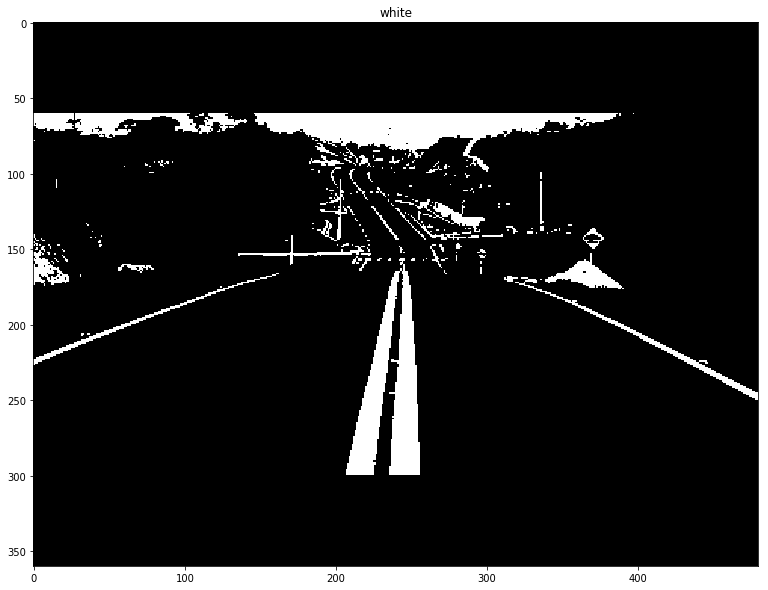

interactive(children=(IntSlider(value=200, description='a', max=255), Output(layout=Layout(height='500px'))), _dom_classes=('widget-interact',))

In [6]:
global Thre_clr_white, res_w, mask_w
Thre_clr_white= ClrThresholding('white', 185 , 255)
res_w, mask_w = Thre_clr_white.clrFilteringGRAY(f_rgb, f_gray)


def runWhiteFilter(a = 200):
    Thre_clr_white = ClrThresholding('white', a , 255)
    res_w, mask_w = Thre_clr_white.clrFilteringGRAY(f_rgb, f_gray)
    cv.imwrite('../TestingImages/pipe.jpg', res_w)
    return

interactive_plot = interactive(runWhiteFilter, a=(0,255,1))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot


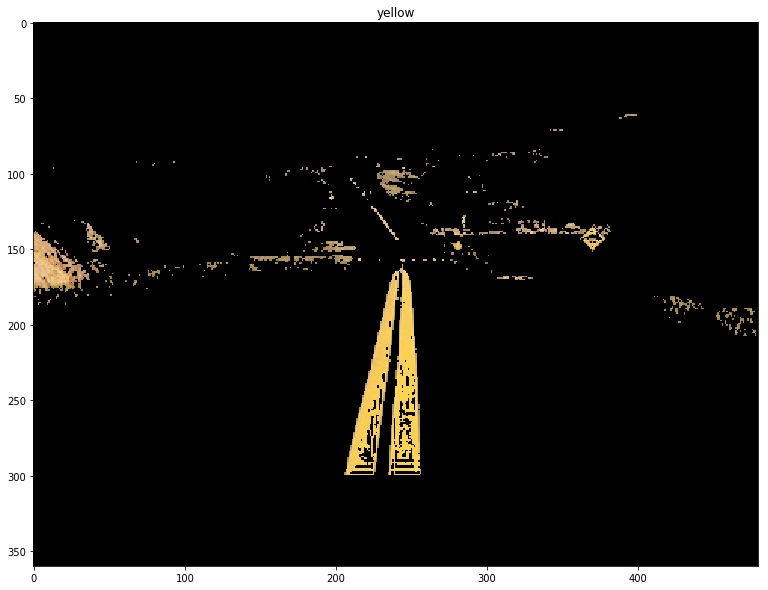

interactive(children=(IntSlider(value=20, description='lh', max=255), IntSlider(value=80, description='ls', max=255), IntSlider(value=154, description='lv', max=255), IntSlider(value=50, description='uh', max=255), IntSlider(value=175, description='us', max=255), IntSlider(value=255, description='uv', max=255), Output(layout=Layout(height='500px'))), _dom_classes=('widget-interact',))

In [7]:
global Thre_clr_yellow, res_y, mask_y
Thre_clr_yellow=ClrThresholding('yellow', np.array([14,80,154]), np.array([23,175,255]))
res_y, mask_y =Thre_clr_yellow.clrFilteringHSV(f_rgb, f_hsv)
def runYellowFilter(lh=20, ls=80, lv=154, uh=50, us=175, uv=255):
    Thre_clr_yellow = ClrThresholding('yellow', np.array([lh,ls,lv]), np.array([uh,us,uv]))
    res_y, mask_y = Thre_clr_yellow.clrFilteringHSV(f_rgb, f_hsv)
    return

interactive_plot2 = interactive(runYellowFilter, lh=(0,255,1),ls=(0,255,1),lv=(0,255,1),uh=(0,255,1),us=(0,255,1),uv=(0,255,1))
output = interactive_plot2.children[-1]
output.layout.height = '500px'
interactive_plot2


In [8]:
# global Thre_clr_whitehsv, res_wh, mask_wh
# Thre_clr_whitehsv=ClrThresholding('white_hsv', np.array([0,0,164]), np.array([255,48,255]))
# res_wh, mask_wh =Thre_clr_whitehsv.clrFilteringHSV(f_rgb, f_hsv)
# def runwhiteHSVFilter(lh=0, ls=0, lv=164, uh=255, us=48, uv=255):
#     Thre_clr_whitehsv = ClrThresholding('white_hsv', np.array([lh,ls,lv]), np.array([uh,us,uv]))
#     res_wh, mask_wh = Thre_clr_whitehsv.clrFilteringHSV(f_rgb, f_hsv)
#     return

# interactive_plot3 = interactive(runwhiteHSVFilter, lh=(0,255,1),ls=(0,255,1),lv=(0,255,1),uh=(0,255,1),us=(0,255,1),uv=(0,255,1))
# output = interactive_plot3.children[-1]
# output.layout.height = '500px'
# interactive_plot3


In [9]:
# result = cv.addWeighted(res_y, 1.0, res_w, 1.0, 0.0)
# plt.imshow(result)
# cv.imwrite('../TestingImages/result.jpg', result)
# plt.title('result')
# plt.show()

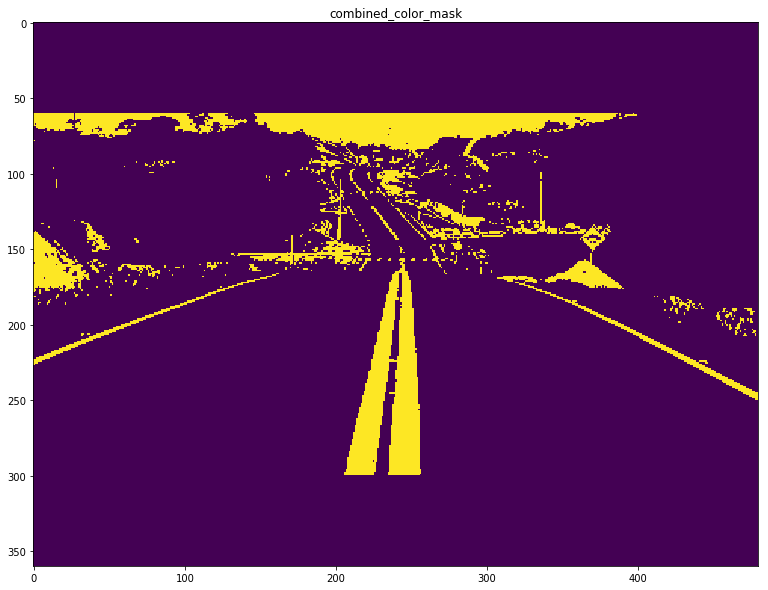

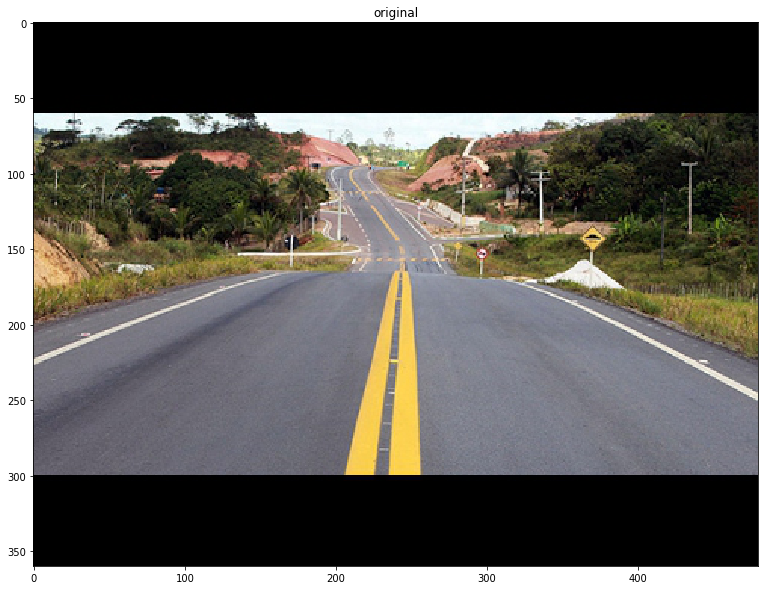

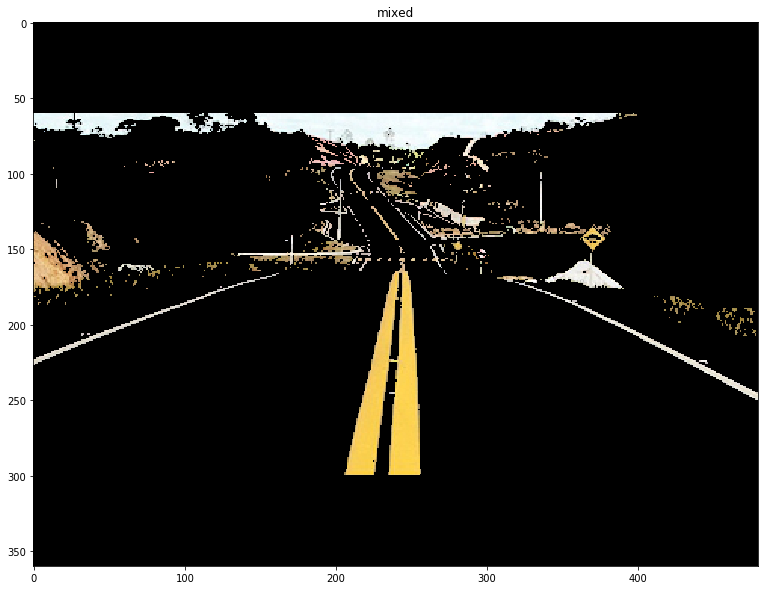

In [10]:
mixed_mask = mask_y|mask_w
mixed_res = cv.bitwise_and(f_rgb, f_rgb, mask=mixed_mask)
result = cv.addWeighted(res_y, 1.0, res_w, 1.0, 0.0)
plt.imshow(mixed_mask)
cv.imwrite('../TestingImages/r.jpg', mixed_mask)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('combined_color_mask')
plt.show()
plt.imshow(f_rgb)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('original')
plt.show()
plt.imshow(mixed_res)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('mixed')
plt.show()

In [11]:
cv.imwrite("../TestingImages/jidan.jpg", mixed_res)

True

In [12]:
def Obtain_Size(img_input):
    img=cv.imread(img_input)
    return img,img.shape

w=interactive(Obtain_Size, img_input='../TestingImages/r.jpg')
type(w)
display(w)
img,img_shape=w.result
row=img_shape[0]
column=img_shape[1]


interactive(children=(Text(value='../TestingImages/r.jpg', description='img_input'), Output()), _dom_classes=('widget-interact',))

In [13]:
@interact(img=fixed(img), img_shape=fixed(img_shape),img_output='../TestingImages/Region_of_Interest.jpg', a_x=(0,column,1),a_y=(0,row,1),b_x=(0,column,1),b_y=(0,row,1),c_x=(0,column,1),c_y=(0,row,1),d_x=(0,column,1),d_y=(0,row,1))
def Region_of_Interest(img, img_shape, img_output, a_x=column ,a_y=0.8*row,b_x=0.5*column,b_y=0.3*row,c_x=0.5*column,c_y=0.3*row,d_x=0,d_y=0.8*row):
    mask = np.zeros_like(img)
    channel = 1
    if len(img_shape) > 2:
        channel = img_shape[2]
    mask_color = (255,)*channel
    cv.fillPoly(mask, np.array([[[a_x,a_y],[b_x,b_y],[c_x,c_y],[d_x,d_y]]]), mask_color)
    masked = cv.bitwise_and(img,mask)
    cv.imwrite(img_output, masked)
    plt.figure(figsize=(20,10))
    _=plt.subplot(121),plt.imshow(img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(masked)
    plt.title('Masked Image'), plt.xticks([]), plt.yticks([])

    plt.show()

interactive(children=(Text(value='../TestingImages/Region_of_Interest.jpg', description='img_output'), IntSlider(value=480, description='a_x', max=480), IntSlider(value=288, description='a_y', max=360), IntSlider(value=240, description='b_x', max=480), IntSlider(value=108, description='b_y', max=360), IntSlider(value=240, description='c_x', max=480), IntSlider(value=108, description='c_y', max=360), IntSlider(value=0, description='d_x', max=480), IntSlider(value=288, description='d_y', max=360), Output()), _dom_classes=('widget-interact',))

In [14]:
def Canny_Edge_Detector(img_input, img_output, quality=100, lower_threshold=200, upper_threshold=230, aperture_size=3, L2gradient=False):

    img = cv.imread(img_input,0)
    edges = cv.Canny(img,lower_threshold, upper_threshold, apertureSize=aperture_size, L2gradient=L2gradient)
    cv.imwrite(img_output, edges)
    plt.figure(figsize=(20,10))
    _=plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()

In [15]:
interact(Canny_Edge_Detector, img_input='../TestingImages/Region_of_Interest.jpg', img_output='../TestingImages/edge_detection.jpg',\
        quality=(0,100,1),\
         lower_threshold=(0,255,1), upper_threshold=(0, 255, 1),\
        aperture_size=(3,7,2), L2gradient=False);

interactive(children=(Text(value='../TestingImages/Region_of_Interest.jpg', description='img_input'), Text(value='../TestingImages/edge_detection.jpg', description='img_output'), IntSlider(value=100, description='quality'), IntSlider(value=200, description='lower_threshold', max=255), IntSlider(value=230, description='upper_threshold', max=255), IntSlider(value=3, description='aperture_size', max=7, min=3, step=2), Checkbox(value=False, description='L2gradient'), Output()), _dom_classes=('widget-interact',))

4.0


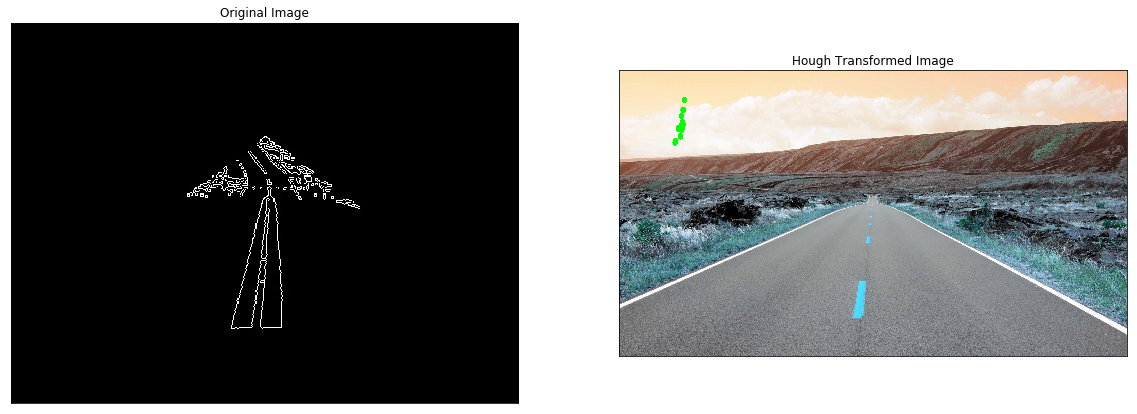

In [18]:
img = cv.imread('../TestingImages/edge_detection.jpg',0)
original = cv.imread('../TestingImages/T0.jpg')
min_line_len = 1000
max_line_Gap = 2
lines = cv.HoughLinesP(img,1,np.pi/180,100,min_line_len, max_line_Gap)
print(len(lines) / 4)
for i in range(10):
    for x1,y1,x2,y2 in lines[i]:
        cv.line(original,(x1,y1),(x2,y2),(0,255,0),20)

cv.imwrite('Hough.jpg', img)
plt.figure(figsize=(20,10))
_=plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(original)
plt.title('Hough Transformed Image'), plt.xticks([]), plt.yticks([])

plt.show()